In [13]:
# FUNCTIONS

#ActivityCodes (0=sedentary 1=standing 2=stepping 2.1=cycling 3.1=primary lying, 3.2=secondary lying 4=non-wear 5=travelling)
def reassign_classes(classes):
  for count, value in enumerate(classes):
    if classes[count] == 2.1:
      classes[count] = 2
    elif classes[count] == 3.1:
      classes[count] = 3
    elif classes[count] == 3.2:
      classes[count] = 3
    elif classes[count] == 5.0:
      classes[count] = 0
    else:
      continue
  return classes

def remove_classes(dataset, stack, class_to_remove):
  remove_non_wear_idx = posture_classes != class_to_remove
  stack = stack[remove_non_wear_idx]
  dataset = dataset[remove_non_wear_idx]
  return dataset, stack

def one_hot_data(stack):
  unique_classes = np.unique(stack)
  stack = tf.one_hot(stack, len(unique_classes))
  return stack

def review_class_imbalance(y_train, y_test, labels=None):
  # Find the unique label values...
  unique_classes_train = np.unique(y_train)
  unique_classes_test = np.unique(y_test)
  # Count the unique label values
  unique_train, counts_train = np.unique(y_train, return_counts=True)
  unique_test, counts_test = np.unique(y_test, return_counts=True)
  try:
    count_class_values_train = dict(zip(labels, counts_train))
    count_class_values_test = dict(zip(labels, counts_test))
  except:
    count_class_values_train = dict(zip(unique_train, counts_train))
    count_class_values_test = dict(zip(unique_test, counts_test))

  print('Train Classes')
  print(count_class_values_train)
  print('--------------')
  print('Test Classes')
  print(count_class_values_test)
  print('--------------')
  return unique_classes_train, unique_classes_test

In [41]:
print(__doc__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, LocalOutlierFactor)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pickle

Automatically created module for IPython interactive environment


In [3]:
from google.colab import drive
drive.mount('/content/drive')

feature_set = np.load('/content/drive/MyDrive/Documents/Work/UOS Post-Doc/Amputee Posture Classification/data/example_4_feature_set.npy')
posture_classes = np.load('/content/drive/MyDrive/Documents/Work/UOS Post-Doc/Amputee Posture Classification/data/example_4_feature_set_classes.npy')

Mounted at /content/drive


In [15]:
print(feature_set)
print(feature_set.shape)
print(posture_classes.shape)

[[2.73674990e+02 4.02610796e-14 0.00000000e+00 ... 2.73674990e+02
  7.48980000e+04 5.68434189e-14]
 [2.74405988e+02 1.14439976e+01 1.45418329e-10 ... 1.98367798e+02
  7.54296114e+04 5.46714887e-08]
 [2.70959412e+02 2.16340051e+01 6.70353082e+00 ... 1.98367798e+02
  7.38870331e+04 8.34102506e+00]
 ...
 [1.88100586e+02 1.12506499e+01 1.24608117e+01 ... 1.60929015e+02
  3.55084074e+04 1.71388993e+01]
 [1.85941195e+02 1.10373358e+01 1.04590692e+01 ... 1.60928934e+02
  3.46959506e+04 1.39878867e+01]
 [1.81200200e+02 8.59351809e+00 7.08823905e+00 ... 1.56783242e+02
  3.29073611e+04 9.30301538e+00]]
(54606, 7)
(54606,)


In [16]:
np.unique(posture_classes)

array([0, 1, 2, 4, 5], dtype=int32)

In [19]:
posture_classes = reassign_classes(posture_classes)
feature_set, posture_classes = remove_classes(feature_set, posture_classes, 4)

X_train, X_test, y_train, y_test = train_test_split(feature_set, posture_classes, test_size=0.2, random_state=42)

#y_train_hot = one_hot_data(y_train)
#y_test_hot = one_hot_data(y_test)

LABELS = ['Sedentary', 'Standing', 'Stepping', 'Lying']

unique_classes_train, unique_classes_test = review_class_imbalance(y_train, y_test, LABELS)

Train Classes
{'Sedentary': 19564, 'Standing': 8453, 'Stepping': 1089}
--------------
Test Classes
{'Sedentary': 4891, 'Standing': 2107, 'Stepping': 279}
--------------


In [39]:
n_neighbors = 10
random_state = 42

dim = feature_set.shape[0]
n_classes = len(np.unique(posture_classes))

pipeline = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
pipeline.fit(X_train, y_train)
knn.fit(pipeline.transform(X_train), y_train)
acc_knn = knn.score(pipeline.transform(X_test), y_test)

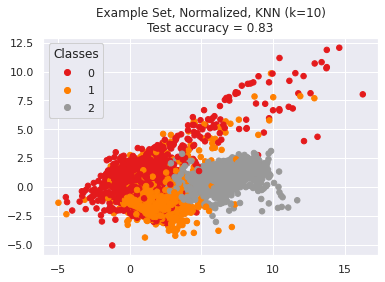

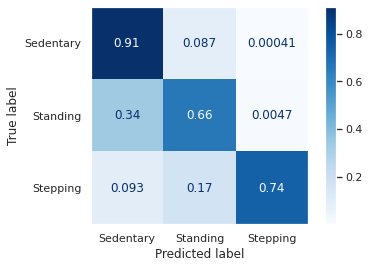

In [40]:
X_embedded = lda.transform(feature_set)
fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=posture_classes, s=30, cmap='Set1')
ax.set_title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format('Example Set',
                                                                 'Normalized',
                                                                 n_neighbors,
                                                                 acc_knn));

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
        
ax.add_artist(legend1)
        
disp = plot_confusion_matrix(knn, lda.transform(X_test), y_test,
                             display_labels=LABELS,
                             cmap=plt.cm.Blues,
                             normalize='true');

plt.grid(False)
plt.show()

In [ ]:
# LeaveOneGroupOut
group_kfold = GroupKFold(n_splits=2)
            
# Fit a nearest neighbor classifier on the embedded training set
acc_knn = cross_val_score(knn, model.transform(X), y, groups=g,  cv=group_kfold)
print(acc_knn)
        
f1_knn = classification_report(model.transform(X), y)
print(f1_knn)

# Classification Report
print(classification_report())

In [ ]:
#save the algorithm
filename = 'knn_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Testing out usage of the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result)